Dependencies

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, Bidirectional, SpatialDropout1D
from keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

Read Data

In [2]:
data = pd.read_csv('tokenized_tweets.csv')
data

,sentimen,tweet,tokenized_tweet
0,negatif,indonesia dihargai bangsa asing berita hoax...,"['indonesia', 'dihargai', 'bangsa', 'asing', '..."
1,netral,batuan langka tasbih jokowi hadiah habib luthf...,"['batuan', 'langka', 'tasbih', 'jokowi', 'hadi..."
2,netral,era jokowi ekonomi indonesia pictwittercomw...,"['era', 'jokowi', 'ekonomi', 'indonesia', 'pic..."
3,positif,sumatera selatan asian games berdampak pd ekon...,"['sumatera', 'selatan', 'asian', 'games', 'ber..."
4,negatif,negara ngutang bngun infrastruktur udah dipake...,"['negara', 'ngutang', 'bngun', 'infrastruktur'..."
...,...,...,...
1810,netral,negarawan sejati sll bangga mengedepankan harg...,"['negarawan', 'sejati', 'sll', 'bangga', 'meng..."
1811,netral,hrs ceramah damai indonesiaku perekonomian me...,"['hrs', 'ceramah', 'damai', 'indonesiaku', 'pe..."
1812,netral,mari bangun bangsa dgn mendukung perekonomian ...,"['mari', 'bangun', 'bangsa', 'dgn', 'mendukung..."
1813,netral,bantu majukan perekonomian bangsa jokowi yuk,"['bantu', 'majukan', 'perekonomian', 'bangsa',..."


In [3]:
print('Total rows:', data.shape[0])
print('Total features:', data.shape[1])

Total rows: 1815
Total features: 3


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1815 entries, 0 to 1814
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sentimen         1815 non-null   object
 1   tweet            1815 non-null   object
 2   tokenized_tweet  1815 non-null   object
dtypes: object(3)
memory usage: 42.7+ KB


In [5]:
X = data.tokenized_tweet
Y = data.sentimen
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)
Y = Y.reshape(-1,1)

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

Conversion & RNN

In [7]:
max_words = 400
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)

word_idx = tok.word_index
v = len(word_idx)
print("the size of vocab =", v) 


the size of vocab = 5454


In [8]:
max_len = 75
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = pad_sequences(sequences,maxlen=max_len)
#Note: untuk "max_len" kalau bisa dibawah 280 (total characters/words saat membuat tweet), silahkan di otak atik

In [9]:
# define RNN
def RNN():
    inputs = Input(name='inputs', shape=[max_len])
    layer = Embedding(max_words, 75)(inputs)
    layer = Bidirectional(LSTM(100))(layer)
    #layer = SpatialDropout1D(0.2)(layer)
    layer = Dense(32,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(3,name='out_layer')(layer)
    layer = Activation('softmax')(layer)
    model = Model(inputs=inputs, outputs=layer)
    return model
#nilai disamping "max_words" bisa diubah sesuai keinginan, belum coba angka lain diatas 150, jadi silahkan di otak atik dan di coba coba

In [10]:
model = RNN()
model.summary()
#Defining Optimizer with learning rate
learning_rate = 0.001
optimizer = RMSprop(learning_rate=learning_rate)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputs (InputLayer)             │ (None, 75)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 75, 75)         │        30,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 200)            │       140,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ FC1 (Dense)                     │ (None, 32)             │         6,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ out_layer (Dense)               │ (None, 3)              │            99 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 3)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 177,331 (692.70 KB)

 Trainable params: 177,331 (692.70 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
mf = model.fit(sequences_matrix, Y_train,batch_size=32, epochs=10,
               validation_split=0.2)
#Note: Untuk "Batch Size" harus dibawah 128, dan epoch 10-20 an , silahkan di otak atik ges 

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.3449 - loss: 1.0968 - val_accuracy: 0.4606 - val_loss: 1.0870
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.3888 - loss: 1.0884 - val_accuracy: 0.4331 - val_loss: 1.0537
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4581 - loss: 1.0649 - val_accuracy: 0.5787 - val_loss: 1.0241
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4686 - loss: 1.0271 - val_accuracy: 0.5118 - val_loss: 1.0030
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5626 - loss: 0.9434 - val_accuracy: 0.6142 - val_loss: 0.9057
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6280 - loss: 0.8704 - val_accuracy: 0.5945 - val_loss: 0.8996
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6889 - loss: 0.7693 - val_accuracy: 0.5630 - val_loss: 0.8826
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7215 - loss: 0.6938 - val_accuracy: 0.5906 - v

In [12]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = pad_sequences(test_sequences, maxlen=max_len)

In [13]:
accr = model.evaluate(test_sequences_matrix, Y_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5807 - loss: 0.9518


In [14]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.948
  Accuracy: 0.576


Plotting

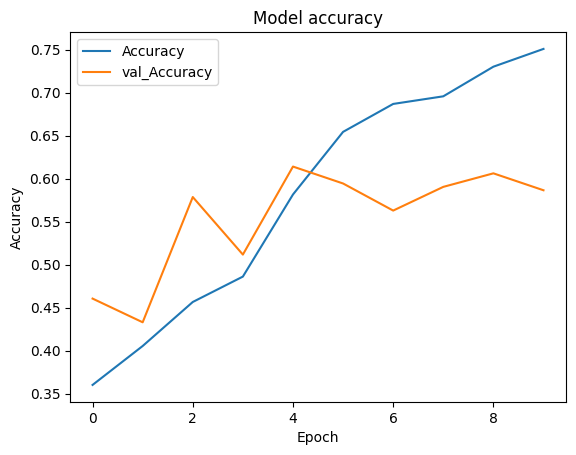

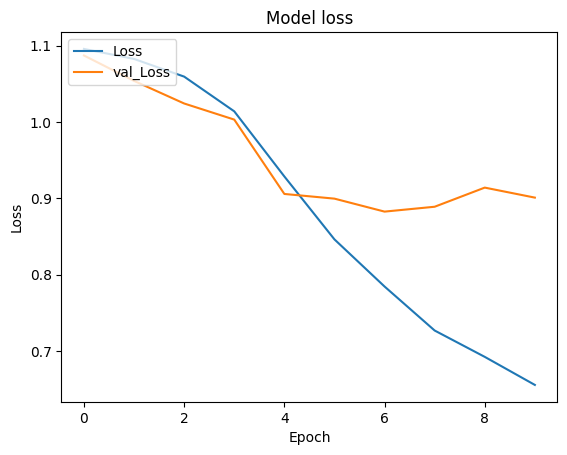

In [15]:
# Plot training & validation accuracy values
plt.plot(mf.history['accuracy'])
plt.plot(mf.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Accuracy', 'val_Accuracy'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(mf.history['loss'])
plt.plot(mf.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Loss', 'val_Loss'], loc='upper left')
plt.show()
